### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
df = pd.DataFrame(data)

ingresos_por_tienda = df.groupby('Lugar de Compra')['Precio'].sum().reset_index()
ingresos_por_tienda.columns = ['Tienda', 'Ingreso Total']

print(ingresos_por_tienda)

      Tienda  Ingreso Total
0     Bogotá       164300.0
1       Cali       757500.0
2  Cartagena       209600.0
3   Medellín       527500.0


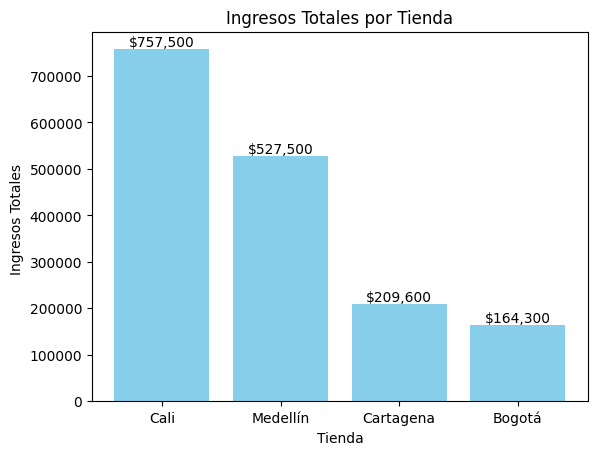

In [25]:
import matplotlib.pyplot as plt

ingresos_por_tienda = ingresos_por_tienda.sort_values('Ingreso Total', ascending=False)

plt.figure

bars = plt.bar(ingresos_por_tienda['Tienda'], ingresos_por_tienda['Ingreso Total'], color='skyblue')

plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=10)
plt.show()

# 2. Ventas por categoría

In [15]:
ventas_por_categoria_tienda = df.groupby(['Lugar de Compra', 'Categoría del Producto']).size().unstack(fill_value=0)

print(ventas_por_categoria_tienda)

Categoría del Producto  Electrodomésticos  Electrónicos  Juguetes  Muebles
Lugar de Compra                                                           
Bogotá                                  0             1         0        0
Cali                                    1             0         0        0
Cartagena                               0             0         1        0
Medellín                                0             0         0        2


<Figure size 1200x600 with 0 Axes>

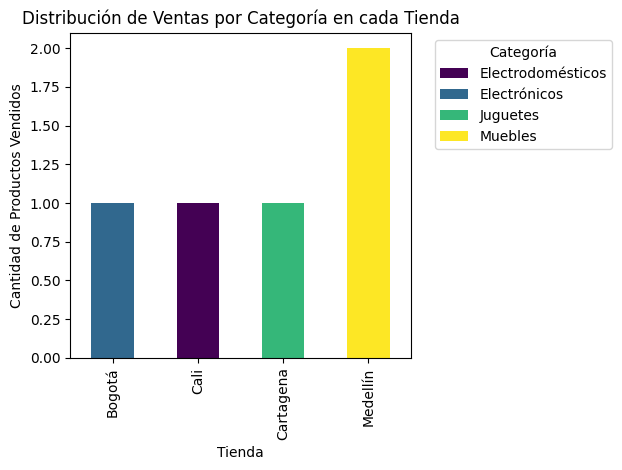

In [22]:
plt.figure(figsize=(12, 6))
ventas_por_categoria_tienda.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribución de Ventas por Categoría en cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')

plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [23]:
# Calcular el promedio de calificaciones por tienda
calificaciones_promedio = df.groupby('Lugar de Compra')['Calificación'].mean().reset_index()
calificaciones_promedio.columns = ['Tienda', 'Calificación Promedio']

# Ordenar de mayor a menor calificación
calificaciones_promedio = calificaciones_promedio.sort_values('Calificación Promedio', ascending=False)

# Mostrar resultados
print(calificaciones_promedio.round(2))

      Tienda  Calificación Promedio
0     Bogotá                    4.0
1       Cali                    4.0
3   Medellín                    3.0
2  Cartagena                    1.0


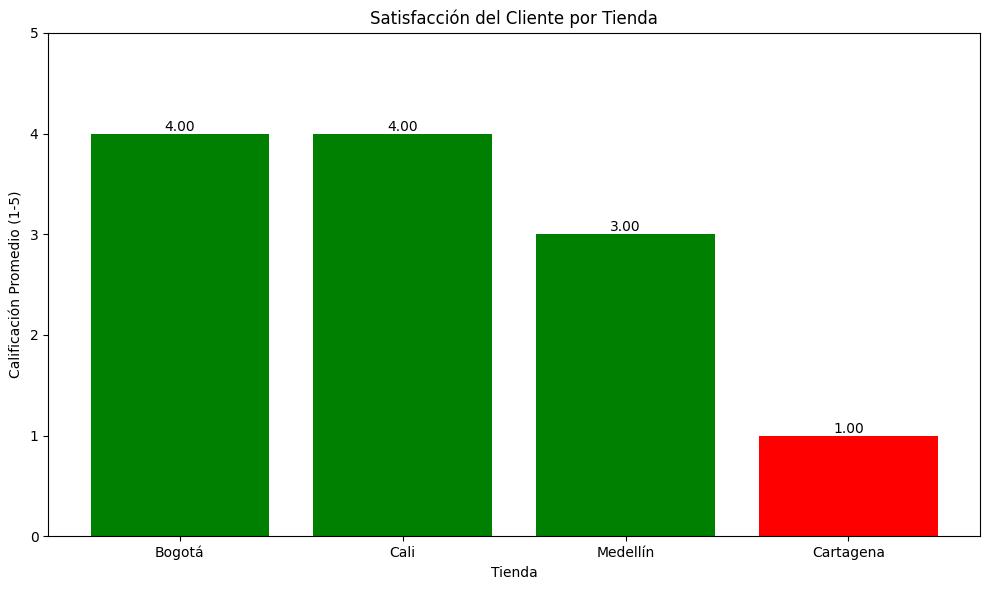

In [31]:
#Grafico
plt.figure(figsize=(10, 6))
bars = plt.bar(calificaciones_promedio['Tienda'], calificaciones_promedio['Calificación Promedio'],
               color=['green' if x >= 3 else 'orange' if x >= 2 else 'red' for x in calificaciones_promedio['Calificación Promedio']])

# Añadir título y etiquetas
plt.title('Satisfacción del Cliente por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.ylim(0, 5)  # Escala de 1 a 5 estrellas

# Añadir los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

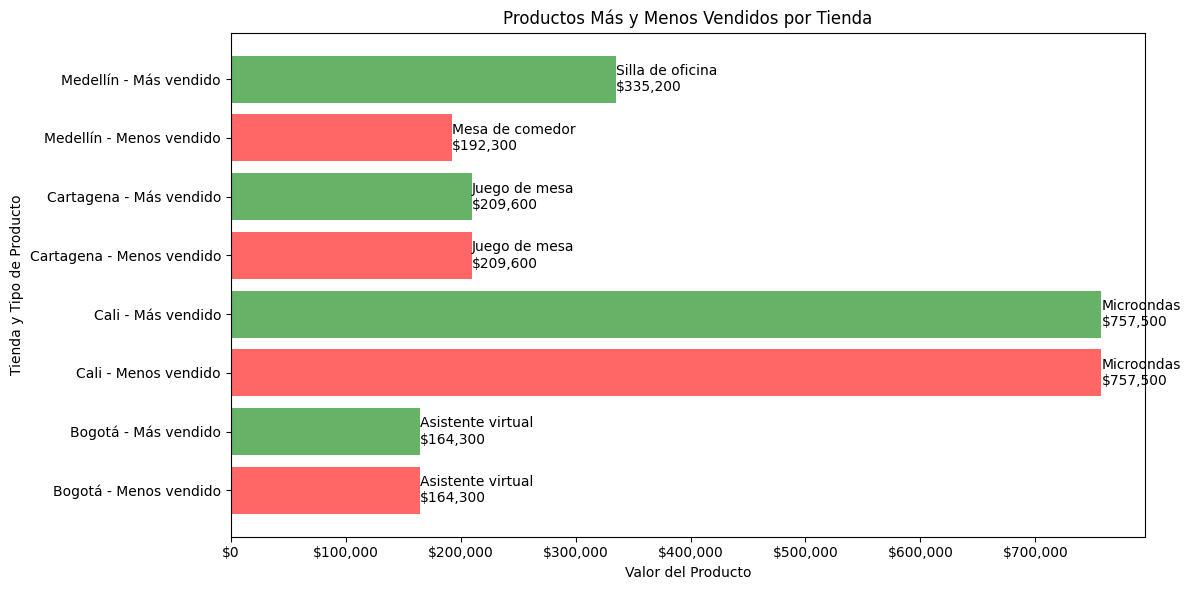

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# 1. Identificar el producto más vendido (mayor precio) por tienda
mas_vendidos = df.loc[df.groupby('Lugar de Compra')['Precio'].idxmax()]

# 2. Identificar el producto menos vendido (menor precio) por tienda
menos_vendidos = df.loc[df.groupby('Lugar de Compra')['Precio'].idxmin()]

# Visualización
plt.figure(figsize=(12, 6))
colors = {'Más vendido': 'green', 'Menos vendido': 'red'}

for i, (_, row) in enumerate(resultados.iterrows()):
    plt.barh(
        f"{row['Lugar de Compra']} - {row['Tipo']}",
        row['Precio'],
        color=colors[row['Tipo']],
        alpha=0.6
    )
    plt.text(
        row['Precio'],
        i,
        f"{row['Producto']}\n${row['Precio']:,.0f}",
        ha='left',
        va='center',
        fontsize=10
    )

plt.title('Productos Más y Menos Vendidos por Tienda')
plt.xlabel('Valor del Producto')
plt.ylabel('Tienda y Tipo de Producto')
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.show()

#Resultados:
##Bogotá:
Más vendido: Asistente virtual ($164,300)

Solo tiene un producto registrado

##Cali:
Más vendido: Microondas ($757,500)

Solo tiene un producto registrado

##Cartagena:
Más vendido: Juego de mesa ($209,600)

Solo tiene un producto registrado

##Medellín:
Más vendido: Silla de oficina ($335,200)

Menos vendido: Mesa de comedor ($192,300)

#Observaciones:
1.Medellín es la única tienda con múltiples productos registrados, permitiendo una comparación real entre productos más y menos vendidos.

2.El microondas en Cali es el producto de mayor valor en todo el conjunto de datos.

3.Todas las demás tiendas solo tienen un producto registrado, por lo que automáticamente es tanto el más como el menos vendido.

4.La visualización muestra claramente la diferencia de valor entre productos en Medellín, donde la silla de oficina supera significativamente a la mesa de comedor.

# 5. Envío promedio por tienda

In [61]:
print("Resultados numéricos:")
print(costo_envio_promedio.round(2))
print("\n")

Resultados numéricos:
      Tienda  Costo de Envío Promedio
1       Cali                  41000.0
2  Cartagena                  15900.0
3   Medellín                  14300.0
0     Bogotá                   9900.0




#Análisis Final:
Cali tiene el costo de envío más alto ($41,000)

Bogotá tiene el costo más bajo ($9,900)

El promedio general es de $20,280

Medellín tiene un costo promedio de $14,300 (promedio de dos envíos)